### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


- **Producto y Categoría**: Artículos vendidos y sus calificaciones.
- **Precio y Envío**: Valores de venta y costos asociados.
- **Fecha y ubicación de compra**: Información temporal y geográfica.
- **Evaluación de compra**: Comentarios de clientes.
- **Tipo de Pago y Cuotas**: Métodos utilizados por los clientes.
- **Coordenadas Geográficas**: Ubicación de las transacciones.

In [2]:
tiendas: tuple[pd.DataFrame, ...] = (tienda, tienda2, tienda3, tienda4)
tiendas_nombres: tuple[str, ...] = tuple(f'Tienda {idx + 1}' for idx in range(len(tiendas)))

print('Ventas registradas en cada tienda')
print(*[(nom, df.shape[0]) for nom, df in zip(tiendas_nombres, tiendas)], sep='\n')

Ventas registradas en cada tienda
('Tienda 1', 2359)
('Tienda 2', 2359)
('Tienda 3', 2359)
('Tienda 4', 2358)


In [3]:
def tope(lista: list[pd.Series], *, superior: bool = True) -> int | float:
    """
    Función para hallar el tope superior o inferior de una lista de Series.
    :param lista: Lista de la cual obtener el parámetro, idealmente contiene Series de Pandas.
    :param superior: Si se busca el tope superior (True) o inferior (False).
    :return: Máximo o mínimo de la lista.
    """
    if superior:
        return max(list(map(lambda x: x.max(), lista)))
    else:
        return min(list(map(lambda x: x.min(), lista)))


def get_col(datos: tuple[pd.DataFrame, ...], col: str) -> pd.Series:
    """
    Función para agrupar una columna de distintos DataFrames
    """
    return pd.concat([idx[col] for idx in datos], axis=0)

# 1. Análisis de facturación



In [4]:
precios: list[float] = list(map(lambda df: df['Precio'].sum(), tiendas))

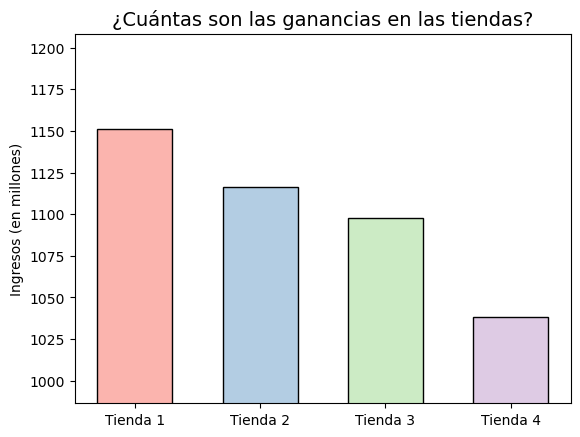

In [5]:
def graph1() -> None:
    x = [f'Tienda {idx+1}' for idx in range(len(tiendas))]
    y = list(map(lambda p: p/1e6, precios))

    lim_sup = tope(y)
    lim_inf = tope(y, superior=False)

    color = plt.get_cmap('Pastel1')(range(4))

    plt.bar(x, y, color=color, width=.6, edgecolor='k')

    plt.title('¿Cuántas son las ganancias en las tiendas?', fontsize=14)
    plt.ylabel('Ingresos (en millones)')
    plt.ylim(lim_inf*.95, lim_sup*1.05)
    plt.show()


graph1()

# 2. Ventas por categoría

In [6]:
def ventas_cat(df) -> pd.Series:
    return (df.groupby('Categoría del Producto')
            .count()['Producto']
            .rename('# Ventas')
            .sort_values(ascending=False))


cat_tiendas: list[pd.Series] = list(map(ventas_cat, tiendas))

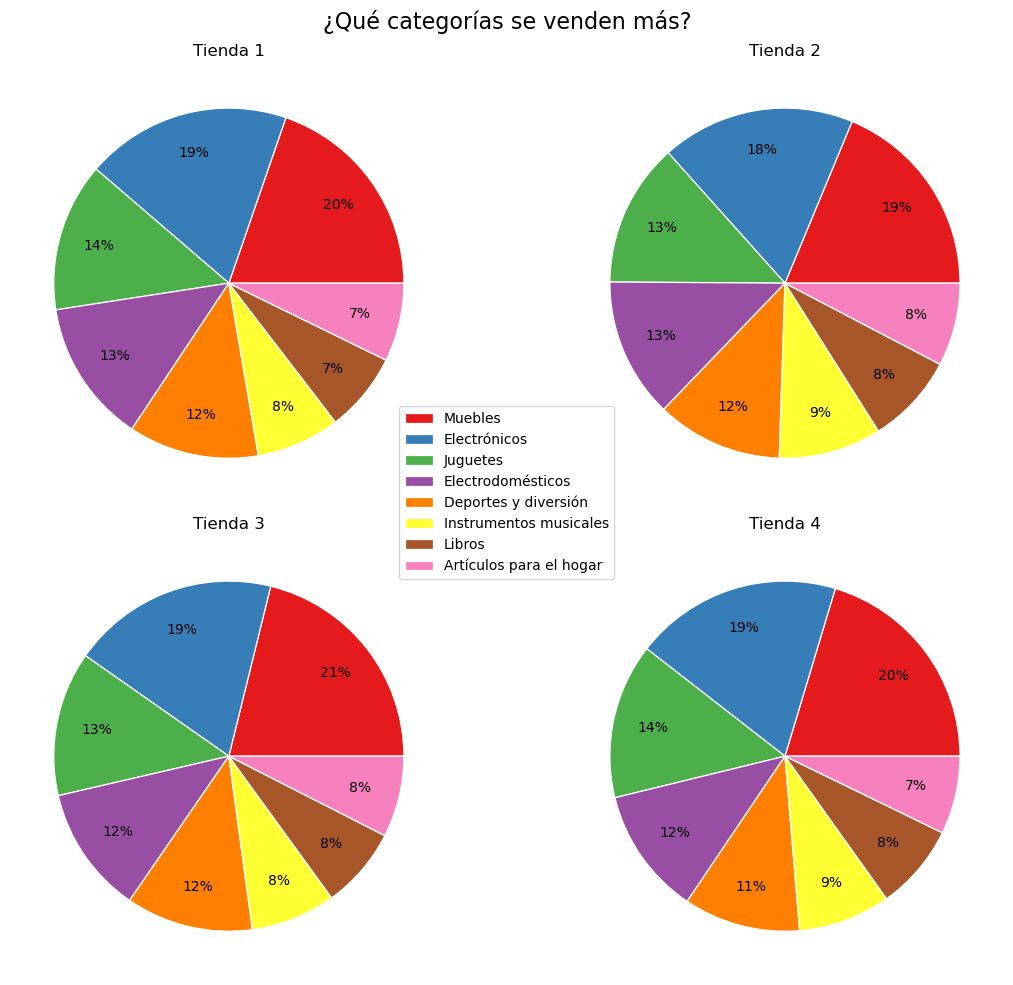

In [7]:
def graph2() -> None:
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    plt.suptitle('¿Qué categorías se venden más?', fontsize=16)

    for idx in range(len(cat_tiendas)):
        i = 0 if idx < 2 else 1
        j = 0 if idx % 2 == 0 else 1

        ax[i,j].set_title(tiendas_nombres[idx])
        ax[i,j].pie(
            cat_tiendas[idx].values,
            labels=None,
            colors=plt.get_cmap('Set1').colors,
            autopct=lambda pct: str(int(round(pct, 0))) + '%',
            pctdistance=.77,
            wedgeprops=dict(edgecolor='w',
                            linewidth=.9,
                            antialiased=True),
        )

    fig.legend(cat_tiendas[0].index, loc='center')
    plt.tight_layout()
    plt.show()


graph2()

# 3. Calificación promedio de la tienda


In [8]:
calificaciones: list[float] = list(map(lambda df: df['Calificación'].mean(), tiendas))

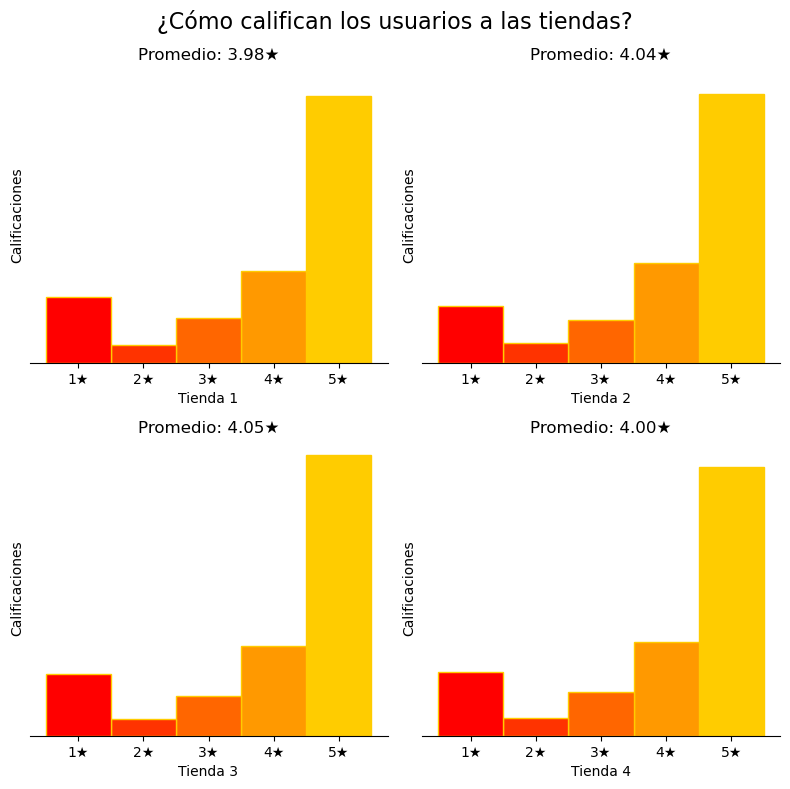

In [9]:
def graph3() -> None:
    fig, ax = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle('¿Cómo califican los usuarios a las tiendas?', fontsize=16)

    conteos = list(map(
        lambda df: df.groupby('Calificación').count().sort_values('Calificación', ascending=False)['Producto'],
        tiendas
    ))
    cant_max = tope(conteos)

    # Colores
    nums = list(conteos[0].index)[::-1]
    n = list(map(lambda x: x/len(nums), nums))
    color = plt.get_cmap('autumn_r')(n)

    ticks = list(map(lambda x: str(x) + '★', nums))

    for idx in range(len(calificaciones)):
        i = 0 if idx < 2 else 1
        j = 0 if idx % 2 == 0 else 1

        ax[i,j].bar(conteos[idx].index, conteos[idx].values, width=1, color=color, edgecolor=color[0])
        ax[i,j].set_title(f'Promedio: {calificaciones[idx]:.2f}★')

        ax[i,j].set_ylim(0, cant_max * 1.05)

        ax[i,j].set_xlabel(tiendas_nombres[idx])
        ax[i,j].set_ylabel('Calificaciones')

        ax[i,j].set_xticks(nums)
        ax[i,j].set_xticklabels(ticks)
        ax[i,j].set_yticks([])

        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()


graph3()

# 4. Productos más y menos vendidos

In [10]:
def top(df, asc=False) -> pd.Series:
    return (df.groupby('Producto')
            .count()['Precio']
            .rename('Vendidos')
            .sort_values(ascending=asc)
            .head(4))


mas_vendidos:   list[pd.Series] = list(map(lambda df: top(df), tiendas))
menos_vendidos: list[pd.Series] = list(map(lambda df: top(df, True), tiendas))

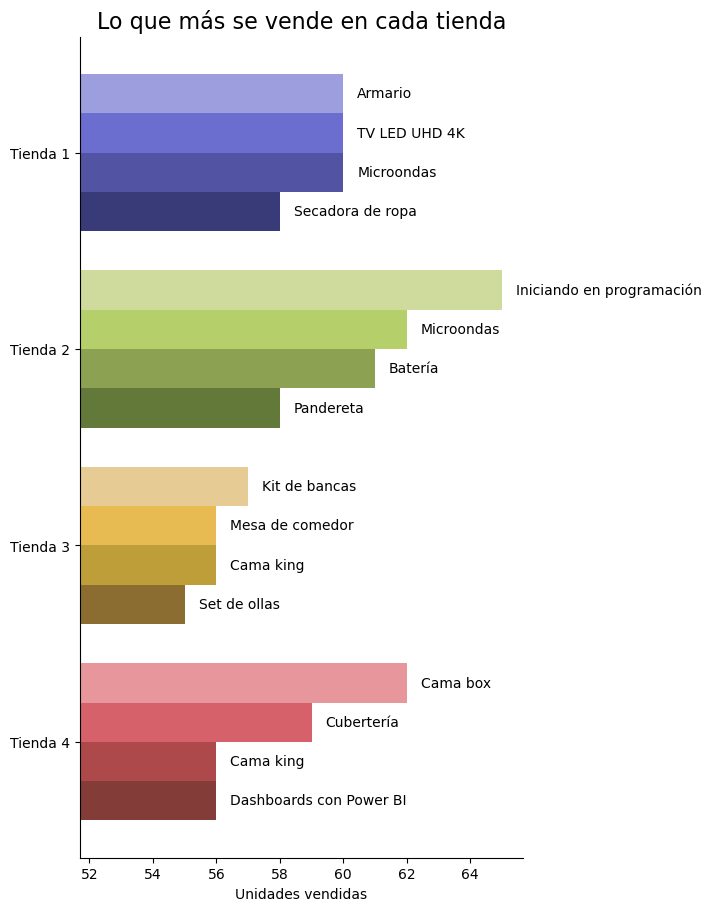

In [11]:
def graph4(lista, superior=True) -> None:
    n_tiendas = len(lista)
    productos = {key: val for key, val in zip(tiendas_nombres, lista)}

    lim_sup = tope(lista)
    lim_inf = tope(lista, superior=False)

    fig, ax = plt.subplots(figsize=(7, 9), layout='constrained')
    titulo = 'Lo que más se vende en cada tienda' if superior else 'Los productos menos adquiridos en las tiendas'
    plt.title(titulo, fontsize=16)

    mult = 0
    height = 1/(n_tiendas+1)
    pos = [y for y in range(n_tiendas)]
    y = pd.Series(pos)

    for idx, item in enumerate(productos.items()):
        labels = [key.index[idx] for key in productos.values()]
        bars = [val.iloc[idx] for val in productos.values()]

        if superior:
            dif = range(len(bars)-(idx+1), n_tiendas*len(bars), len(bars))
        else:
            dif = range(idx, n_tiendas*len(bars), len(bars))
        color = plt.get_cmap('tab20b')(dif)

        offset = height * mult
        rects = ax.barh(y + offset, bars, height=height, label=labels, color=color)
        ax.bar_label(rects, labels, padding=10, )
        mult += 1

    ax.set_xlim(lim_inf*.94, lim_sup*1.01)
    ax.set_xlabel('Unidades vendidas')

    ax.set_yticks(y + height*1.5, tiendas_nombres)
    ax.invert_yaxis()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.show()

graph4(mas_vendidos)

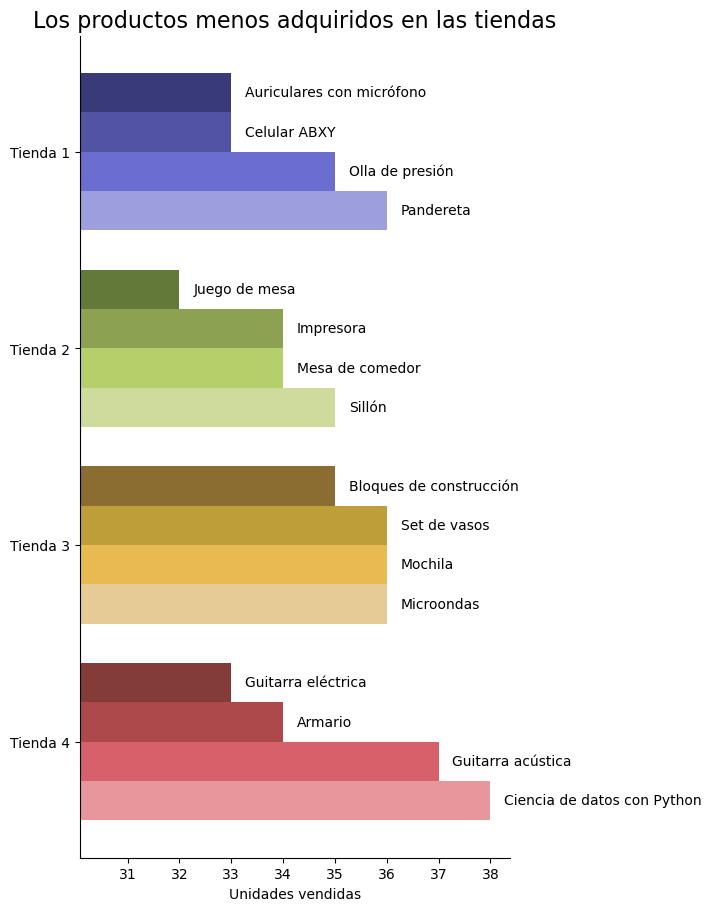

In [12]:
graph4(menos_vendidos, False)

# 5. Envío promedio por tienda

In [13]:
promedios: list[pd.Series] = list(map(lambda df: df['Costo de envío'].mean(), tiendas))

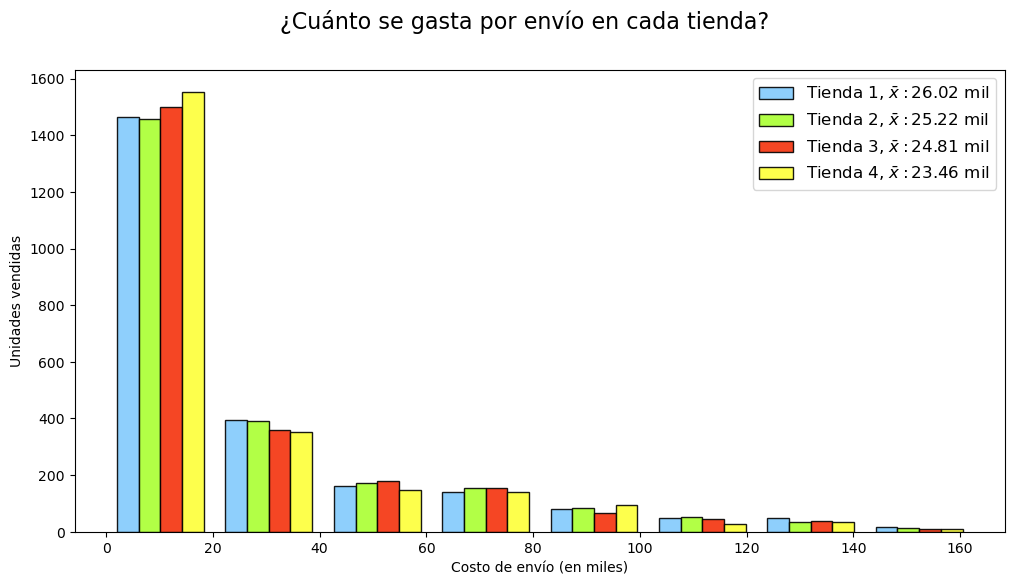

In [14]:
def graph5() -> None:
    x = [env['Costo de envío'] for env in tiendas]
    x = list(map(lambda f: f/1e3, x))

    colors = ['xkcd:sky', 'xkcd:lime', 'xkcd:vermillion', 'xkcd:lemon yellow']
    labels = [f'{tiendas_nombres[idx]}, $\\bar{{x}}: {(lab.item()/1e3):.2f}$ mil' for idx, lab in enumerate(promedios)]

    fig = plt.figure(figsize=(12, 6))
    fig.suptitle('¿Cuánto se gasta por envío en cada tienda?', fontsize=16)

    plt.hist(x, bins=8, histtype='bar', label=labels, color=colors, edgecolor='k', alpha=.9)
    plt.xlabel('Costo de envío (en miles)')
    plt.ylabel('Unidades vendidas')
    plt.legend(fontsize=12)
    plt.show()


graph5()

# Extra: Análisis del desempeño geográfico

In [15]:
import geopandas as gpd